# Outliers
ZScore
Memmal Sleep dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
animals = pd.read_csv(r"C:\Users\ophir\OneDrive\Desktop\mammalsleep.csv")
animals = animals.iloc[:,1:12]
animals.head()

,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


<u>Mammal Sleep Dataset</u>

<table>
    <tr><th>species</th><td>Species of animal</td></tr>
    <tr><th>bw</th><td> Body weight (kg)</td></tr>
    <tr><th>brw</th><td> Brain weight (g)</td></tr>
    <tr><th>sws</th><td> Slow wave ("nondreaming") sleep (hrs/day)</td></tr>
    <tr><th>ps</th><td> Paradoxical ("dreaming") sleep (hrs/day)</td></tr>
    <tr><th>ts</th><td> Total sleep (hrs/day) (sum of slow wave and paradoxical sleep)</td></tr>
    <tr><th>mls</th><td> Maximum life span (years)</td></tr>
    <tr><th>gt</th><td> Gestation time (days)</td></tr>
    <tr><th>pi</th><td> Predation index (1-5), 1 = least likely to be preyed upon</td></tr>
    <tr><th>sei</th><td> Sleep exposure index (1-5), 1 = least exposed (e.g. animal sleeps in a well-protected den), 5 = most exposed</td></tr>
    <tr><th>odi</th><td> Overall danger index (1-5) based on the above two indices and other information, 1 = least danger (from other animals), 5 = most danger (from other animals)</td></tr>
</table>


In [ ]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  62 non-null     object 
 1   bw       62 non-null     float64
 2   brw      62 non-null     float64
 3   sws      48 non-null     float64
 4   ps       50 non-null     float64
 5   ts       58 non-null     float64
 6   mls      58 non-null     float64
 7   gt       58 non-null     float64
 8   pi       62 non-null     int64  
 9   sei      62 non-null     int64  
 10  odi      62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
animals.describe()

,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
count,62.000000,62.000000,48.000000,50.000000,58.000000,58.000000,58.000000,62.000000,62.000000,62.000000
mean,198.789984,283.134194,8.672917,1.972000,10.532759,19.877586,142.353448,2.870968,2.419355,2.612903
std,899.158011,930.278942,3.666452,1.442651,4.606760,18.206255,146.805039,1.476414,1.604792,1.441252
min,0.005000,0.140000,2.100000,0.000000,2.600000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.600000,4.250000,6.250000,0.900000,8.050000,6.625000,35.750000,2.000000,1.000000,1.000000
50%,3.342500,17.250000,8.350000,1.800000,10.450000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,48.202500,166.000000,11.000000,2.550000,13.200000,27.750000,207.500000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,17.900000,6.600000,19.900000,100.000000,645.000000,5.000000,5.000000,5.000000


# Outlier Detection

### Graphical methods

Creating data set of continuese data

In [ ]:
#Continues Numeric Columns
cols= ['bw','brw','sws','ps','ts','mls','gt']
con_df = animals[cols]

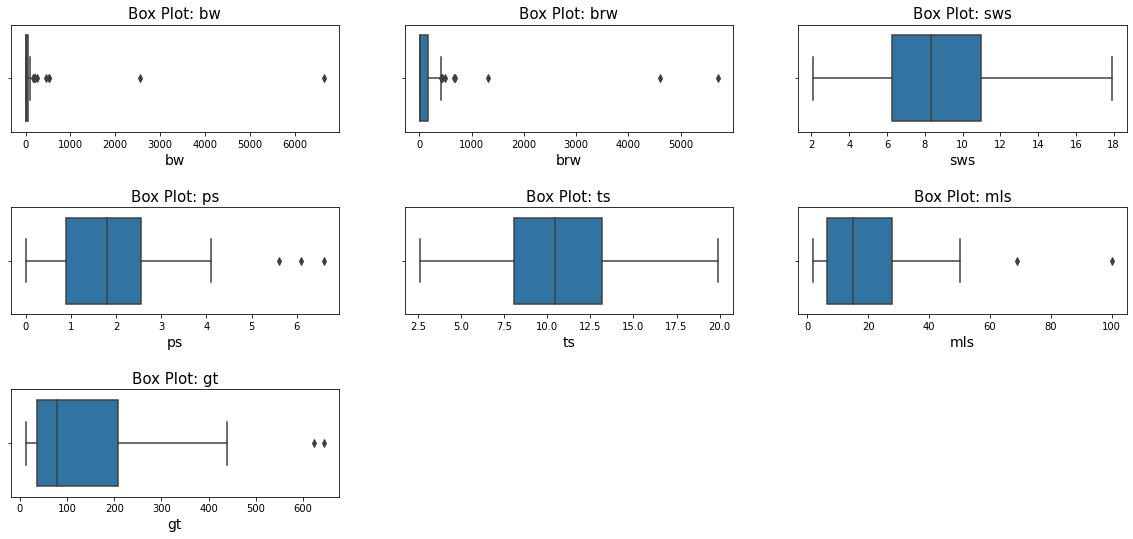

In [ ]:
## Using box (Wiskers) plot
plt.figure(figsize=(20,200))

def outliers_boxplot(animals):
    for i, col in enumerate(animals.columns):

            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=animals, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)

outliers_boxplot(con_df)

## Using Mathematical Functions

### Z-Score

In [ ]:
# Importing scipy stats and zscore libreries
from scipy import stats
from scipy.stats import zscore

Mammals' Body Weight

In [ ]:
#Results using z-score
z = np.abs(stats.zscore(animals.bw))
print(z)

0     7.237778
1     0.221768
2     0.219094
3     0.221858
4     2.632885
        ...   
57    0.220647
58    0.222773
59    0.218191
60    0.218965
61    0.218348
Name: bw, Length: 62, dtype: float64


<Axes: ylabel='bw'>

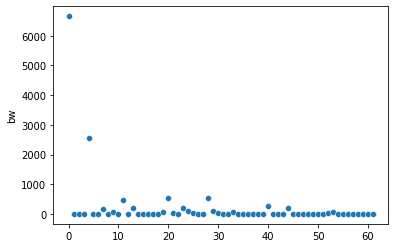

In [ ]:
###  using scatterplots
sns.scatterplot(x=animals.index,y=animals['bw'])

Mammals' Brain Weight

<Axes: ylabel='brw'>

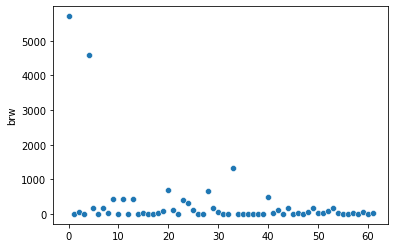

In [ ]:
sns.scatterplot(x=animals.index,y=animals['brw'])

<Axes: ylabel='bw'>

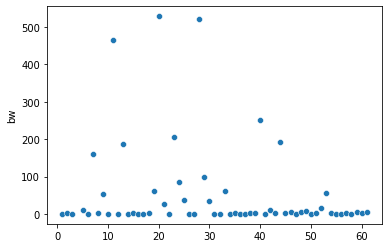

In [ ]:
## Eliminating those points
animals2 = animals.copy()
#2.5 Standart Diviatin from CT
threshold = 2.5
animals2 = animals2[(z < threshold)]

sns.scatterplot(x=animals2.index,y=animals2['bw'])

Ex. <br>
1. Calculate z-scores for the 'brw' column to identify outliers<br>
2. Return the rows where 'brw' outliers appear

In [ ]:
# Calculate z-scores for the 'brw' column to identify outliers

animals['brw_z'] = zscore(animals['brw'])

# Define the threshold for identifying outliers (How many SD from the mean)
#(xi-mean)/SD=Z-score
threshold = 2.5

# Identify outliers in the 'brw' column
outliers_brw = animals[abs(animals['brw_z']) > threshold]

# Display the table with outliers for the 'brw' feature
outliers_brw

,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z
0,African elephant,6654.0,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,5.883379
4,Asian elephant,2547.0,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,4.681532


# Missing Values Analysis and Imputation


## Checking the Missing Mechanisms


In [ ]:
print(animals.isnull().sum())

species     0
bw          0
brw         0
sws        14
ps         12
ts          4
mls         4
gt          4
pi          0
sei         0
odi         0
brw_z       0
dtype: int64


<Axes: >

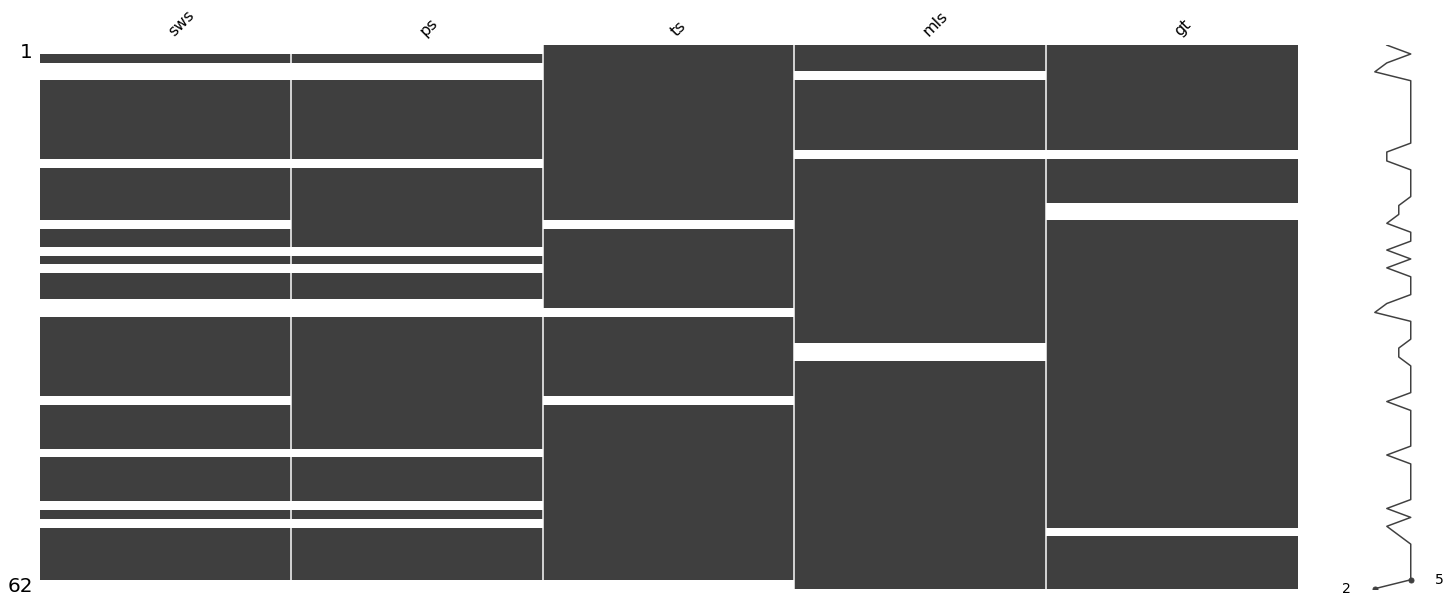

In [ ]:
### !pip install missingno
import missingno as msno

### plot the missingness (nullity) matrix
missingdata_df = animals.columns[animals.isnull().any()].tolist()
msno.matrix(animals[missingdata_df])


<Axes: >

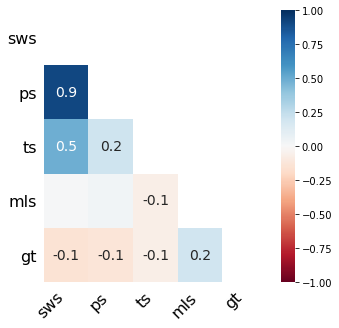

In [ ]:
## missingness correlation heatmap

msno.heatmap(animals[missingdata_df], figsize=(5,5))

In [ ]:
# [['sws','ps','ts','mls','gt']]
animals2 = animals.copy()

animals2['sws_na'] = 0
animals2.loc[(animals2['sws'].isnull()),['sws_na']] = 1

animals2['ps_na'] = 0
animals2.loc[(animals2['ps'].isnull()),['ps_na']] = 1

animals2['ts_na'] = 0
animals2.loc[(animals2['ts'].isnull()),['ts_na']] = 1

animals2['mls_na'] = 0
animals2.loc[(animals2['mls'].isnull()),['mls_na']] = 1

animals2['gt_na'] = 0
animals2.loc[(animals2['gt'].isnull()),['gt_na']] = 1

animals2.head()


,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z,sws_na,ps_na,ts_na,mls_na,gt_na
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,5.883379,1,1,0,0,0
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,-0.299686,0,0,0,0,0
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,-0.258613,1,1,0,0,0
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,-0.300661,1,1,0,1,0
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,4.681532,0,0,0,0,0


In [ ]:
print(animals2.loc[:,('sei','sws_na')].groupby(['sei']).count())

     sws_na
sei        
1        27
2        13
3         4
4         5
5        13


# Missing Values Imputation

### Dropout

In [ ]:
#animals2 = animals[['sws','ps','ts','mls','gt']].replace(0, np.NaN)
animals2 = animals.copy()
# drop rows with missing values
animals2.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print(animals2.shape)


(42, 12)


From 62 rows initially, we have 41 rows now...

In [ ]:
animals.isna().sum()

species     0
bw          0
brw         0
sws        14
ps         12
ts          4
mls         4
gt          4
pi          0
sei         0
odi         0
brw_z       0
dtype: int64

In [ ]:
animals2.isna().sum()

species    0
bw         0
brw        0
sws        0
ps         0
ts         0
mls        0
gt         0
pi         0
sei        0
odi        0
brw_z      0
dtype: int64

### Statistical Imputation

This imply to substitute missing values by a statistical measure. The most commonly used are the mean and the median.

In [ ]:
##### indicate the missing points with one_zero
# [['sws','ps','ts','mls','gt']]
animals2 = animals.copy()

animals2['sws_na'] = 0
animals2.loc[(animals2['sws'].isnull()),['sws_na']] = 1

animals2['ps_na'] = 0
animals2.loc[(animals2['ps'].isnull()),['ps_na']] = 1

animals2['ts_na'] = 0
animals2.loc[(animals2['ts'].isnull()),['ts_na']] = 1

animals2['mls_na'] = 0
animals2.loc[(animals2['mls'].isnull()),['mls_na']] = 1

animals2['gt_na'] = 0
animals2.loc[(animals2['gt'].isnull()),['gt_na']] = 1

animals2.head()


,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z,sws_na,ps_na,ts_na,mls_na,gt_na
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,5.883379,1,1,0,0,0
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,-0.299686,0,0,0,0,0
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,-0.258613,1,1,0,0,0
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,-0.300661,1,1,0,1,0
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,4.681532,0,0,0,0,0


In [ ]:
# impute mean for the following vars: sws, ps, ts, mls, gt
sws_mean = animals2['sws'].mean()
animals2['sws'] = animals2['sws'].fillna(sws_mean)

ps_mean = animals2['ps'].mean()
animals2['ps'] = animals2['ps'].fillna(ps_mean)

ts_mean = animals2['ts'].mean()
animals2['ts'] = animals2['ts'].fillna(ts_mean)

mls_mean = animals2['mls'].mean()
animals2['mls'] = animals2['mls'].fillna(mls_mean)

gt_mean = animals2['gt'].mean()
animals2['gt'] = animals2['gt'].fillna(gt_mean)

# summarize the number of rows and columns in the dataset
print(animals2.shape)
animals2.head()

(62, 17)


,species,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z,sws_na,ps_na,ts_na,mls_na,gt_na
0,African elephant,6654.000,5712.0,8.672917,1.972,3.3,38.600000,645.0,3,5,3,5.883379,1,1,0,0,0
1,African giant pouched rat,1.000,6.6,6.300000,2.000,8.3,4.500000,42.0,3,1,3,-0.299686,0,0,0,0,0
2,Arctic Fox,3.385,44.5,8.672917,1.972,12.5,14.000000,60.0,1,1,1,-0.258613,1,1,0,0,0
3,Arctic ground squirrel,0.920,5.7,8.672917,1.972,16.5,19.877586,25.0,5,2,3,-0.300661,1,1,0,1,0
4,Asian elephant,2547.000,4603.0,2.100000,1.800,3.9,69.000000,624.0,3,5,4,4.681532,0,0,0,0,0


In [ ]:
print(animals.describe())
print("----------------------------------------------------------------------------------")
print(animals2.describe())

                bw          brw        sws         ps         ts         mls  \
count    62.000000    62.000000  48.000000  50.000000  58.000000   58.000000   
mean    198.789984   283.134194   8.672917   1.972000  10.532759   19.877586   
std     899.158011   930.278942   3.666452   1.442651   4.606760   18.206255   
min       0.005000     0.140000   2.100000   0.000000   2.600000    2.000000   
25%       0.600000     4.250000   6.250000   0.900000   8.050000    6.625000   
50%       3.342500    17.250000   8.350000   1.800000  10.450000   15.100000   
75%      48.202500   166.000000  11.000000   2.550000  13.200000   27.750000   
max    6654.000000  5712.000000  17.900000   6.600000  19.900000  100.000000   

               gt         pi        sei        odi         brw_z  
count   58.000000  62.000000  62.000000  62.000000  6.200000e+01  
mean   142.353448   2.870968   2.419355   2.612903  4.029035e-17  
std    146.805039   1.476414   1.604792   1.441252  1.008163e+00  
min     12.

<Axes: xlabel='sws', ylabel='ps'>

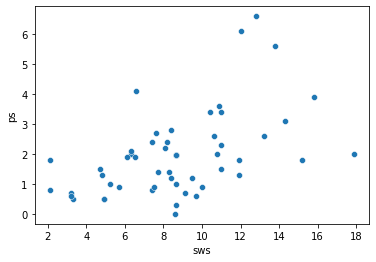

In [ ]:
sns.scatterplot(x='sws',y='ps',data=animals2)

NaNs Filled with Mean

<Axes: xlabel='sws', ylabel='ts'>

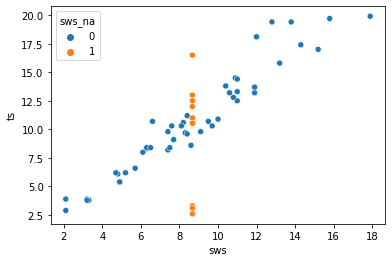

In [ ]:
sns.scatterplot(x='sws',y='ts',data=animals2, hue=animals2['sws_na'])

<Axes: xlabel='sws', ylabel='gt'>

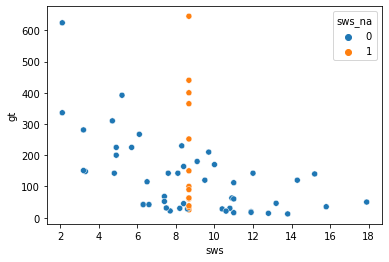

In [ ]:
sns.scatterplot(x='sws',y='gt',data=animals2, hue=animals2['sws_na'])

### Machine Learning imputation: kNN imputation


In [ ]:
animals3 = animals.copy()

In [ ]:
animals3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  62 non-null     object 
 1   bw       62 non-null     float64
 2   brw      62 non-null     float64
 3   sws      48 non-null     float64
 4   ps       50 non-null     float64
 5   ts       58 non-null     float64
 6   mls      58 non-null     float64
 7   gt       58 non-null     float64
 8   pi       62 non-null     int64  
 9   sei      62 non-null     int64  
 10  odi      62 non-null     int64  
 11  brw_z    62 non-null     float64
dtypes: float64(8), int64(3), object(1)
memory usage: 5.9+ KB


In [ ]:
animals3.isna().sum()

species     0
bw          0
brw         0
sws        14
ps         12
ts          4
mls         4
gt          4
pi          0
sei         0
odi         0
brw_z       0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
animals3 = animals.copy()
imp_cols = animals3.select_dtypes(include = ['float64', 'int64']).columns
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = pd.DataFrame(knn_imputer.fit_transform(animals3[imp_cols]),columns = imp_cols)

In [ ]:
#!pip install fancyimpute
import fancyimpute

(CVXPY) Sep 28 12:27:45 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Sep 28 12:27:45 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: The specified module could not be found.')
(CVXPY) Sep 28 12:27:45 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: The specified module could not be found.')


In [ ]:
fancyimpute.__version__


'0.7.0'

In [ ]:
X = animals.copy()
X = X.iloc[:,1:11]
X.head()

,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
0,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [ ]:
X.columns

Index(['bw', 'brw', 'sws', 'ps', 'ts', 'mls', 'gt', 'pi', 'sei', 'odi'], dtype='object')

In [ ]:
X_imputed = fancyimpute.KNN(3).fit_transform(X)
X_imputed = pd.DataFrame(X_imputed,columns=X.columns)
X_imputed.head()

Imputing row 1/62 with 2 missing, elapsed time: 0.002


,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
0,6654.000,5712.0,2.831436,1.636559,3.3,38.600000,645.0,3.0,5.0,3.0
1,1.000,6.6,6.300000,2.000000,8.3,4.500000,42.0,3.0,1.0,3.0
2,3.385,44.5,7.801627,2.522966,12.5,14.000000,60.0,1.0,1.0,1.0
3,0.920,5.7,10.519283,2.956912,16.5,6.707765,25.0,5.0,2.0,3.0
4,2547.000,4603.0,2.100000,1.800000,3.9,69.000000,624.0,3.0,5.0,4.0


In [ ]:
#animals2.iloc[:,11:]

In [ ]:
X_imputed = pd.concat([X_imputed,animals2.iloc[:,11:]],axis=1)
X_imputed.head()

,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z,sws_na,ps_na,ts_na,mls_na,gt_na
0,6654.000,5712.0,2.831436,1.636559,3.3,38.600000,645.0,3.0,5.0,3.0,5.883379,1,1,0,0,0
1,1.000,6.6,6.300000,2.000000,8.3,4.500000,42.0,3.0,1.0,3.0,-0.299686,0,0,0,0,0
2,3.385,44.5,7.801627,2.522966,12.5,14.000000,60.0,1.0,1.0,1.0,-0.258613,1,1,0,0,0
3,0.920,5.7,10.519283,2.956912,16.5,6.707765,25.0,5.0,2.0,3.0,-0.300661,1,1,0,1,0
4,2547.000,4603.0,2.100000,1.800000,3.9,69.000000,624.0,3.0,5.0,4.0,4.681532,0,0,0,0,0


<Axes: ylabel='sws'>

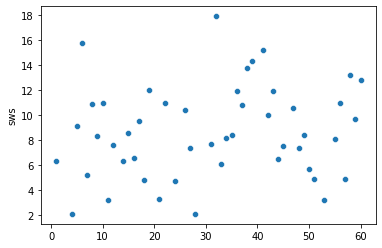

In [ ]:
sns.scatterplot(x=animals.index,y=animals['sws'])

<Axes: ylabel='sws'>

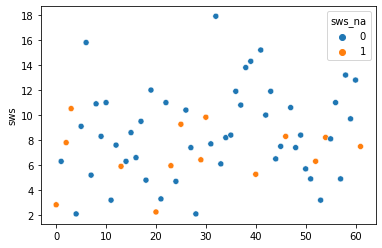

In [ ]:
sns.scatterplot(x=X_imputed.index,y=X_imputed['sws'],hue=X_imputed['sws_na'])

### MICE Imputation

In [ ]:
### MICE
## Multiple Imputation by Chained Equations
#X_imputed = IterativeImputer(max_iter=15)
X_imputed = fancyimpute.IterativeImputer(max_iter=15).fit_transform(X)
X_imputed = pd.DataFrame(X_imputed,columns=X.columns)
X_imputed.head()

,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi
0,6654.000,5712.0,6.353291,-3.053291,3.3,38.600000,645.0,3.0,5.0,3.0
1,1.000,6.6,6.300000,2.000000,8.3,4.500000,42.0,3.0,1.0,3.0
2,3.385,44.5,9.051554,3.448446,12.5,14.000000,60.0,1.0,1.0,1.0
3,0.920,5.7,9.663998,6.836002,16.5,12.034693,25.0,5.0,2.0,3.0
4,2547.000,4603.0,2.100000,1.800000,3.9,69.000000,624.0,3.0,5.0,4.0


In [ ]:
X_imputed = pd.concat([X_imputed,animals2.iloc[:,11:]],axis=1)
X_imputed.head()

,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z,sws_na,ps_na,ts_na,mls_na,gt_na
0,6654.000,5712.0,6.353291,-3.053291,3.3,38.600000,645.0,3.0,5.0,3.0,5.883379,1,1,0,0,0
1,1.000,6.6,6.300000,2.000000,8.3,4.500000,42.0,3.0,1.0,3.0,-0.299686,0,0,0,0,0
2,3.385,44.5,9.051554,3.448446,12.5,14.000000,60.0,1.0,1.0,1.0,-0.258613,1,1,0,0,0
3,0.920,5.7,9.663998,6.836002,16.5,12.034693,25.0,5.0,2.0,3.0,-0.300661,1,1,0,1,0
4,2547.000,4603.0,2.100000,1.800000,3.9,69.000000,624.0,3.0,5.0,4.0,4.681532,0,0,0,0,0


<Axes: ylabel='sws'>

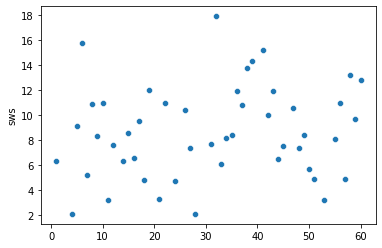

In [ ]:
sns.scatterplot(x=animals.index,y=animals['sws'])

<Axes: ylabel='sws'>

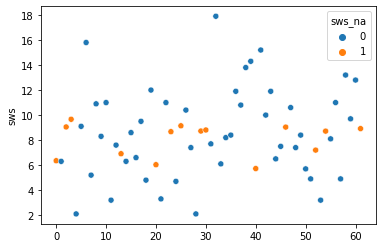

In [ ]:
sns.scatterplot(x=X_imputed.index,y=X_imputed['sws'],hue=X_imputed['sws_na'])

In [ ]:
imputed_data

,bw,brw,sws,ps,ts,mls,gt,pi,sei,odi,brw_z
0,6654.000,5712.0,2.1,1.8,3.3,38.6,645.0,3.0,5.0,3.0,5.883379
1,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3.0,1.0,3.0,-0.299686
2,3.385,44.5,7.4,2.4,12.5,14.0,60.0,1.0,1.0,1.0,-0.258613
3,0.920,5.7,10.4,3.4,16.5,9.0,25.0,5.0,2.0,3.0,-0.300661
4,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3.0,5.0,4.0,4.681532
...,...,...,...,...,...,...,...,...,...,...,...
57,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3.0,1.0,3.0,-0.293509
58,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3.0,2.0,2.0,-0.304129
59,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4.0,3.0,4.0,-0.243983
60,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2.0,1.0,1.0,-0.302612


<Axes: >

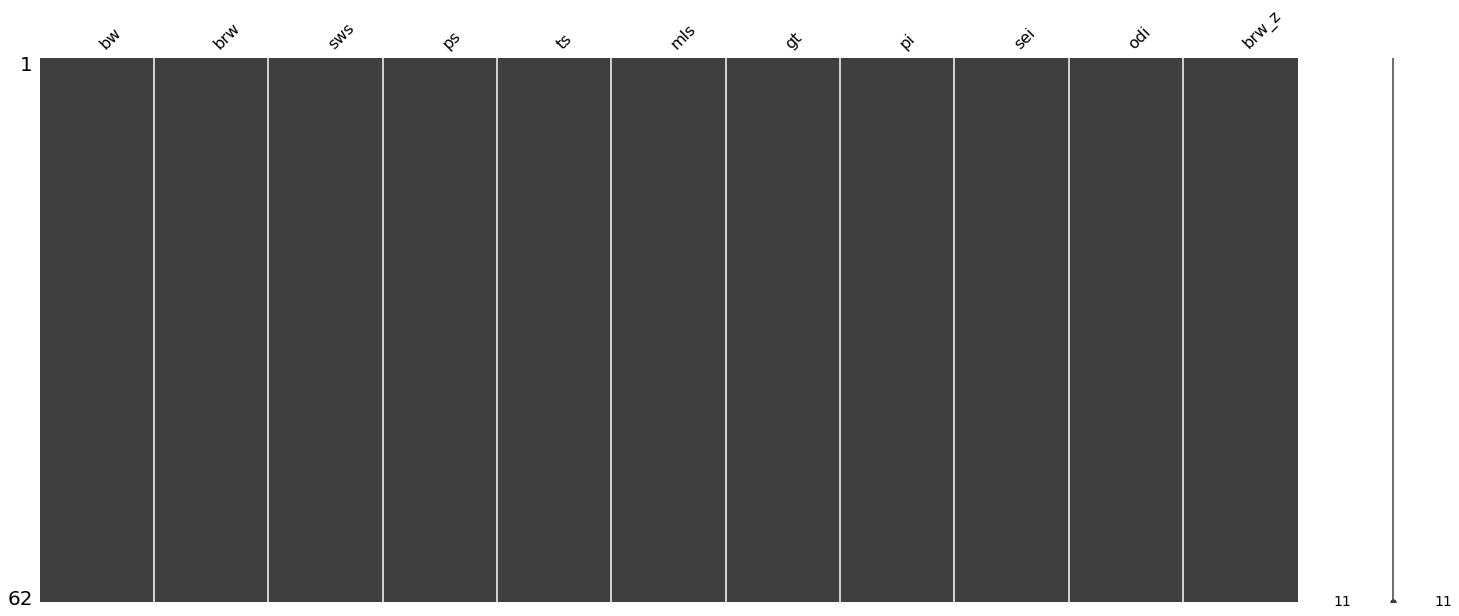

In [ ]:
msno.matrix(imputed_data)

# Great